# Pick Lables

<br><br>Start by loading segy seismic volumes:


In [4]:
%run "seismic viewer code/all.py"

In [5]:
display(get_input)

SelectFilesButton(description='Select Segy file', icon='square-o', style=ButtonStyle(button_color='orange'))

In [7]:
seismic_segy = check_and_read_input(get_input.files[0])

 
Loaded file:  C:/Users/hildeha/Dev/Hackathon 2019/FORCE_2019/100_Poseidon3D_FullStack_Sub2_Gather_InstFreqError(10.0,001,125).segy 

--- Inlines:
  --- Number of inlines:  126 
  --- Inline range:  2300 - 2425
 
--- Xlines:
  --- Number of xlines:  1001 
  --- Xline range:  4000 - 5000
 
--- Time/Depth samples:
  --- Number of Time/Depth samples:  1001 
  --- Time/Depth range:  0.0 - 4000.0 
  --- Time/Depth step:  4.0


In [8]:
il = 0
test = pd.DataFrame(seismic_segy.iline[seismic_segy.ilines[il]].T).reset_index()
melted_test = pd.melt(test[test.columns[1:]], var_name='xline', value_name='value')
melted_test['iline'] = il

melted_test.loc[melted_test.xline==0]

xline  value  iline
0        0    1.0      0
1        0    1.0      0
2        0   19.0      0
3        0   19.0      0
4        0    0.0      0
...    ...    ...    ...
996      0    0.0      0
997      0    0.0      0
998      0    0.0      0
999      0    0.0      0
1000     0    0.0      0

[1001 rows x 3 columns]

## Create seismic object

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot(line):
    plt.figure(figsize=(10,10))
    plt.imshow(line.T, cmap='seismic', vmin=-np.amax(line)*0.7,vmax=np.amax(line)*0.7)
    plt.colorbar()
    plt.show()

In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

class Line(object):
    def __init__(self, line=None):
        self.line = line if line is not None else None
        self.scaler = widgets.FloatSlider(min=0, max=1, step=0.1, description='scaler: ') if line is not None else None
        
    def plot_line(self, scaler):
        plt.figure(figsize=(10,10))
        plt.imshow(self.line.T, cmap='seismic', vmin=-np.amax(self.line)*scaler,vmax=np.amax(self.line)*scaler)
        plt.colorbar()
        plt.show()
        
    def interactive_plot(self):
        interact(self.plot_line, scaler=self.scaler)

In [11]:
class Volume(object):
    def __init__(self, input_object=None):
        
        self.input_object = input_object if input_object is not None else None
        self.type = 'pickle'  if type(input_object) is np.ndarray else 'segy' if type(input_object) is segyio.segy.SegyFile else None
        self.volume = input_object if type(input_object) is np.ndarray else np.array(input_object.iline) if type(input_object) is segyio.segy.SegyFile else None
        self.ilines = np.arange(input_object.shape[0]) if type(input_object) is np.ndarray else input_object.ilines if type(input_object) is segyio.segy.SegyFile else None
        self.xlines = np.arange(input_object.shape[1]) if type(input_object) is np.ndarray else input_object.xlines if type(input_object) is segyio.segy.SegyFile else None
        self.samples = np.arange(input_object.shape[2]) if type(input_object) is np.ndarray else input_object.samples if type(input_object) is segyio.segy.SegyFile else None
        self.sample_rate = (input_object.samples[1]-input_object.samples[0]) if type(input_object) is segyio.segy.SegyFile else None
        
        self.tick = widgets.Checkbox(description='Show xline', disabled=False) 
        self.il_scroller = widgets.IntSlider(min=min(self.ilines), max=max(self.ilines), step=1, description='inline:', continuous_update=False) if input_object is not None else None
        self.xl_scroller = widgets.IntSlider(min=min(self.xlines), max=max(self.xlines), step=1, description='xline:', continuous_update=False) if input_object is not None else None
        self.scaler = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='scaler: ', continuous_update=True) if input_object is not None else None
        

        
        
    def plot_two(self, scaler, il_scroller, xl_scroller):

        
        fig, ax = plt.subplots(1,2,figsize=(25,20), sharey=True) 
        
        if self.type is 'segy':   
            iline = il_scroller - min(self.ilines)
            xline = xl_scroller - min(self.xlines)
            a = ax[0].imshow(self.input_object.iline[self.input_object.ilines[iline]].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[0].axvline(x=xline, ymin=min(np.arange(len(self.samples))), ymax=max(np.arange(len(self.samples))), c='yellow', lw=4) 
            ax[1].imshow(self.input_object.xline[self.input_object.xlines[xline]].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[1].axvline(x=iline, ymin=min(np.arange(len(self.samples))), ymax=max(np.arange(len(self.samples))), c='yellow', lw=4)             
            numy=9
            ax[0].set_yticks(np.ones(numy+1)*np.arange(numy+1)*int(len(segy_volume.samples)/numy))
            ax[0].set_yticklabels(segy_volume.samples[::int(len(segy_volume.samples)/numy)])
            ax[1].set_yticks(np.ones(numy+1)*np.arange(numy+1)*int(len(segy_volume.samples)/numy))
            ax[1].set_yticklabels(segy_volume.samples[::int(len(segy_volume.samples)/numy)])
            numx=6
            ax[1].set_xticks(np.ones(numx+1)*np.arange(numx+1)*int(len(segy_volume.ilines)/numx))
            ax[1].set_xticklabels(segy_volume.ilines[::int(len(segy_volume.ilines)/numx)])
            ax[0].set_xticks(np.ones(numx+1)*np.arange(numx+1)*int(len(segy_volume.xlines)/numx))
            ax[0].set_xticklabels(segy_volume.xlines[::int(len(segy_volume.xlines)/numx)])
        else: 
            iline = il_scroller
            xline = xl_scroller
            a = ax[0].imshow(self.volume[iline,:,:].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[0].axvline(x=xline, ymin=min(self.samples), ymax=max(self.samples), c='yellow', lw=4) 
            ax[1].imshow(self.volume[:,xline,:].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[1].axvline(x=iline, ymin=min(self.samples), ymax=max(self.samples), c='yellow', lw=4) 
        ax[0].set_title('inline {}'.format(il_scroller), fontsize=25)
        ax[1].set_title('xline {}'.format(xl_scroller), fontsize=25)
        
        fig.subplots_adjust(right=1.3)
        fig.colorbar(a)
        ax[1].yaxis.set_tick_params(which='both', labelbottom=True)
        plt.show()

       
        #     def plot_xline_and_inline(self):
#         widget = interactive(self.plot_two, scaler=self.scaler, il_scroller=self.il_scroller, xl_scroller=self.xl_scroller)
#         controls = HBox(widget.children[:-1])
#         output = widget.children[3]
#         display(VBox([controls, output]))
#         return output

    
    def plot_xline_and_inline(self):
        interact(self.plot_two, scaler=self.scaler, il_scroller=self.il_scroller, xl_scroller=self.xl_scroller)



In [12]:
segy_volume = Volume(seismic_segy)

**Un-comment to plot**

In [13]:
#segy_volume.plot_xline_and_inline()

## matplotlib

In [14]:
from IPython.display import display

In [15]:
import itertools
from sklearn.linear_model import LinearRegression
from scipy import interpolate
%matplotlib notebook


In [16]:
global xs
global ys
global x_pos

xs = []; ys = []; x_pos = []

### THIS DELETES ALL VALUES SAVED IN RESULTS DF
results = pd.DataFrame(columns=['x','y','xline'])
results.to_csv('picks.csv', index=False)

In [17]:
xline_scroller = widgets.IntSlider(min=min(segy_volume.xlines), max=max(segy_volume.xlines), step=10, description='xline:', continuous_update=False)
color_scale = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.1, description='scaler: ', continuous_update=False)

def plot(xline, scaler):
    
    
    
    fig, ax = plt.subplots()
    c = ax.imshow(segy_volume.input_object.xline[xline].T, cmap='gray', vmin=0,vmax=np.amax(segy_volume.volume)*scaler)
    ax.set_aspect(aspect=0.2)
    plt.colorbar(c)
    def onclick(event):
        
        print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
              ('double' if event.dblclick else 'single', event.button,
               event.x, event.y, event.xdata, event.ydata))

        ax.scatter(event.xdata, event.ydata, c='orange')


        xs.append(event.xdata)
        ys.append(event.ydata)
        x_pos.append(xline)
        

    cid = fig.canvas.mpl_connect('button_press_event', onclick)


def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
    xs = []; ys = []; x_pos = []

button = widgets.Button(description="Save values")
button.on_click(run_all)


In [21]:
xs = []; ys = []; x_pos = []
plt.rcParams['figure.figsize'] = [5, 10]
interact(plot, xline=xline_scroller, scaler=color_scale)

interactive(children=(IntSlider(value=4000, continuous_update=False, description='xline:', max=5000, min=4000,…

<function __main__.plot(xline, scaler)>

In [22]:
display(button)

<IPython.core.display.Javascript object>

Button(description='Save values', style=ButtonStyle())

In [23]:
x = xs
y = ys
f = interpolate.interp1d(y, x)

ynew = np.arange(int(min(y))+1, int(max(y))-1,1)
xnew = f(ynew)   # use interpolation function returned by `interp1d`
temp = np.array(list(zip(xnew,ynew,np.ones(len(xnew))*np.max(x_pos))))

temp_result = pd.DataFrame(temp, columns=results.columns)

with open('picks.csv', 'a') as f:
    temp_result.to_csv(f, header=False, index=False)

xs = []; ys = []; x_pos = []

In [24]:
pd.read_csv('picks.csv').tail(40)

x      y   xline
464  53.480058  770.0  4000.0
465  52.944763  771.0  4000.0
466  52.409469  772.0  4000.0
467  51.874175  773.0  4000.0
468  51.338881  774.0  4000.0
469  50.803587  775.0  4000.0
470  50.268293  776.0  4000.0
471  49.732999  777.0  4000.0
472  49.197705  778.0  4000.0
473  48.662410  779.0  4000.0
474  48.127116  780.0  4000.0
475  47.591822  781.0  4000.0
476  47.056528  782.0  4000.0
477  46.521234  783.0  4000.0
478  45.985940  784.0  4000.0
479  45.450646  785.0  4000.0
480  44.915352  786.0  4000.0
481  44.380058  787.0  4000.0
482  43.844763  788.0  4000.0
483  43.309469  789.0  4000.0
484  42.774175  790.0  4000.0
485  42.238881  791.0  4000.0
486  41.703587  792.0  4000.0
487  41.168293  793.0  4000.0
488  40.632999  794.0  4000.0
489  40.097705  795.0  4000.0
490  39.562410  796.0  4000.0
491  39.027116  797.0  4000.0
492  38.491822  798.0  4000.0
493  37.956528  799.0  4000.0
494  37.421234  800.0  4000.0
495  36.885940  801.0  4000.0
496  36.350646  802.0  4000.0
497  35.815352  803.0  4000.0
498  35.280058  804.0  4000.0
499  34.744763  805.0  4000.0
500  34.209469  806.0  4000.0
501  33.674175  807.0  4000.0
502  33.138881  808.0  4000.0
503  32.603587  809.0  4000.0

<IPython.core.display.Javascript object>


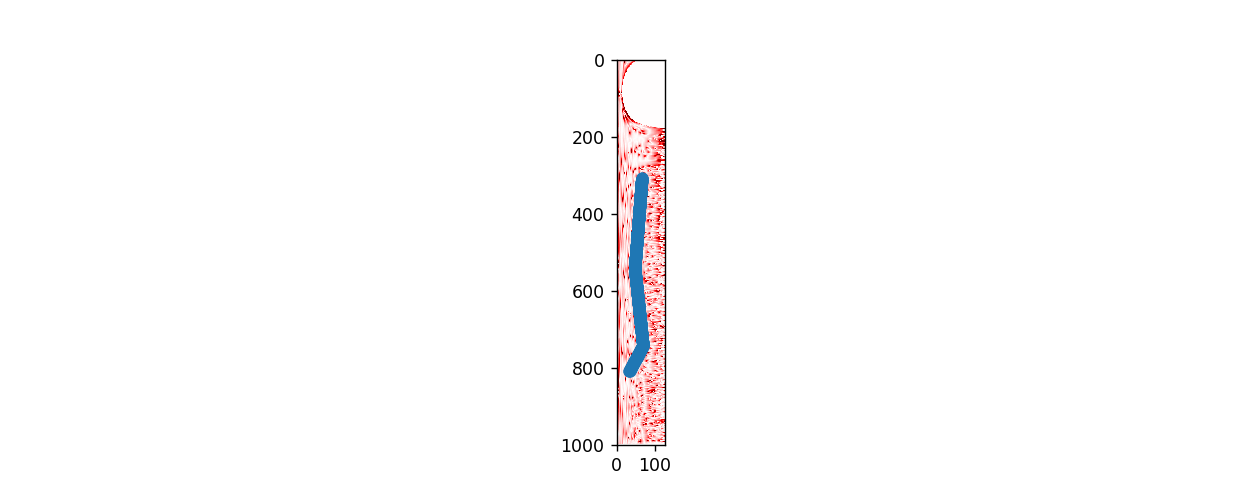

In [26]:
from scipy import interpolate

plt.figure(figsize=(10,4))
plt.xlim(0,125)

plt.scatter(temp_result.loc[temp_result['xline']==temp_result['xline'].max()]['x'],temp_result.loc[temp_result['xline']==temp_result['xline'].max()]['y'])

plt.plot(xnew, ynew, '-')
plt.imshow(segy_volume.input_object.xline[temp_result['xline'].max()].T, cmap='seismic', vmin=-np.amax(segy_volume.volume)*0.5,vmax=np.amax(segy_volume.volume)*0.5)

In [ ]:
#plt.close('all')